In [1]:
from pathlib import Path
parent_dir = str(Path.cwd().parent)
%cd $parent_dir

/Users/tomtalpir/Random/pyERGM


In [2]:
from utils import *
from ergm import ERGM
from metrics import *

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# Replicating the `Sampson` example from R's ERGM
The original R ERGM paper (Hunter et al. 2008) begins with a basic example of modeling Sampson's Monestary data, which consists of a directed network with $n=18$ nodes. This network models social interactions among a group of monks (See Sampson 1969 for more details). 

In the paper, An ERGM model is fit based on the Sampson network, using `num_of_edges` as its sole feature. The R fit yields a coefficient of `-0.9071582`, which is our aim.

In [3]:
# Matrix copied manually, TODO - Create a `data` dir in our project and save as a pickle or something.
sampson_matrix = np.array(
    [[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], 
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], 
    [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
    [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], 
    [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], 
    [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], 
    [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 
    [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], 
    [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]]
)


Initial thetas - [0.30600206]
optimization started
Step 1 - grad: [0.], window_grad: 81.46 lr: 0.1000000000, thetas: [0.26650871], time from start: 0.04, sample_size: 500, sliding_grad_window_k: 20
Step 101 - grad: [0.82941904], window_grad: 0.99 lr: 0.0348678440, thetas: [-0.88884516], time from start: 2.93, sample_size: 809, sliding_grad_window_k: 39
Reached a confidence of 0.99 with the hotelling convergence test! DONE! 
hotelling - 0.00014725093723160298, hotelling_critical_value=0.0001571761481686165


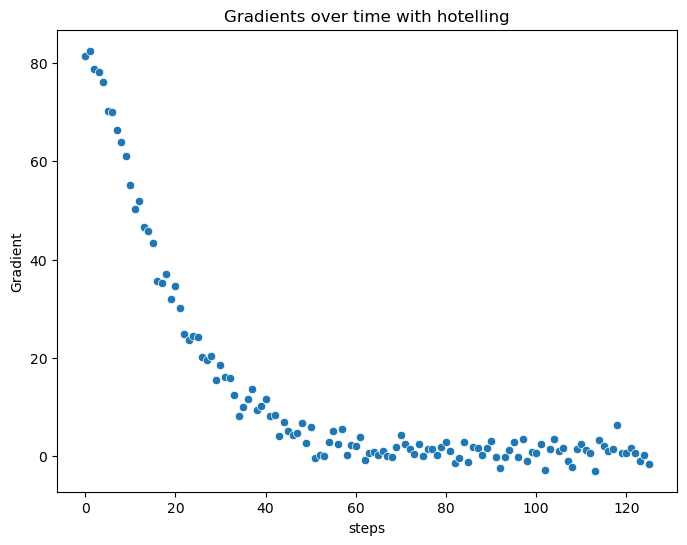

Fitted theta: [-0.9024813]


In [4]:
n = sampson_matrix.shape[0]
is_directed = True

number_of_edges_metric = NumberOfEdgesDirected() if is_directed else NumberOfEdgesUndirected()
fitted_model = ERGM(n, [number_of_edges_metric], is_directed=is_directed, sample_size=500, n_mcmc_steps=50)

convergence_criterion = "hotelling"
grads, hotelling = fitted_model.fit(sampson_matrix, lr=0.1, opt_steps=300, 
                         lr_decay_pct=0.1, steps_for_decay=10,
                         sliding_grad_window_k=20, sample_pct_growth=0.05, 
                         convergence_criterion=convergence_criterion, 
                         optimization_method="newton_raphson",
                         hotelling_confidence=0.99
                         )

grads = [x[0] for x in grads]


fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(grads, ax=ax)
ax.set(xlabel='steps', ylabel='Gradient')
ax.set_title(f"Gradients over time with {convergence_criterion}")
plt.show()

print(f"Fitted theta: {fitted_model._thetas}")

In [6]:
hotelling[:3]

[{'dist': 9850.559081122503,
  'hotelling_t': 48516757105.34251,
  'hotelling_F': 48516757105.34251,
  'critical_val': 0.00393609751327179},
 {'dist': 10078.573777565307,
  'hotelling_t': 50788824694.913506,
  'hotelling_F': 50788824694.913506,
  'critical_val': 0.00393609751327179},
 {'dist': 11168.629272299177,
  'hotelling_t': 62369139911.029015,
  'hotelling_F': 62369139911.029015,
  'critical_val': 0.00393609751327179}]

As we can see, our model reaches a theta that is extremely close to the actual R result.

In [7]:
min(hotelling)

3.6470473599830022

10847918.021540165

## Now test a model with TotalReciprocity + NumberOfEdges

Initial thetas - [0.21768988 0.60136133]
optimization started
Step 1 - lr: 0.0500000000, time from start: 0.03, sample_size: 500, sliding_grad_window_k: 20
	 Sample size increased at step 50 to 525
Step 51 - lr: 0.0450000000, time from start: 1.37, sample_size: 525, sliding_grad_window_k: 21
	 Sample size increased at step 100 to 551
Step 101 - lr: 0.0405000000, time from start: 2.77, sample_size: 551, sliding_grad_window_k: 23
	 Sample size increased at step 150 to 578
Step 151 - lr: 0.0364500000, time from start: 4.19, sample_size: 578, sliding_grad_window_k: 25
	 Sample size increased at step 200 to 606
Step 201 - lr: 0.0328050000, time from start: 5.78, sample_size: 606, sliding_grad_window_k: 27
	 Sample size increased at step 250 to 636
Step 251 - lr: 0.0295245000, time from start: 7.38, sample_size: 636, sliding_grad_window_k: 29
	 Sample size increased at step 300 to 667
Step 301 - lr: 0.0265720500, time from start: 9.15, sample_size: 667, sliding_grad_window_k: 31
	 Sample siz

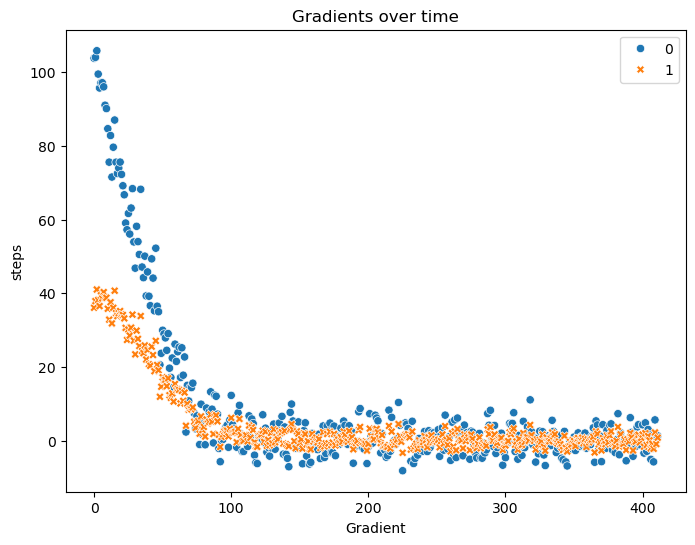

Fitted theta: [-1.78334922  2.37105084]


In [15]:
n = sampson_matrix.shape[0]
is_directed = True

number_of_edges_metric = NumberOfEdgesDirected() if is_directed else NumberOfEdgesUndirected()

estimated_p_seed = np.sum(sampson_matrix) / (n*(n-1))

metrics = [number_of_edges_metric, TotalReciprocity()]
fitted_model = ERGM(n, metrics, is_directed=is_directed, sample_size=500, n_mcmc_steps=20, seed_MCMC_proba=estimated_p_seed)

# convergence_criterion = "zero_grad_norm"
convergence_criterion = "hotelling"
grads, hotelling = fitted_model.fit(sampson_matrix, lr=0.05, opt_steps=500, 
                         lr_decay_pct=0.1, steps_for_decay=50,
                         sliding_grad_window_k=20, sample_pct_growth=0.05, 
                         convergence_criterion=convergence_criterion, 
                         optimization_method="newton_raphson",
                         hotelling_confidence=0.99
                         )

# grads, _ = fitted_model.fit(sampson_matrix, lr=1, opt_steps=400, sliding_grad_window_k=20, sample_pct_growth=0.05, lr_decay_pct=0.1, steps_for_decay=10)


fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(grads, ax=ax)
ax.set(xlabel='Gradient', ylabel='steps')
ax.set_title("Gradients over time")

plt.show()

print(f"Fitted theta: {fitted_model._thetas}")

#### Took a while (~1 minute), but results are pretty close!
True results in R -
* $\theta_1 = -1.7625$
* $\theta_2 = 2.3132$

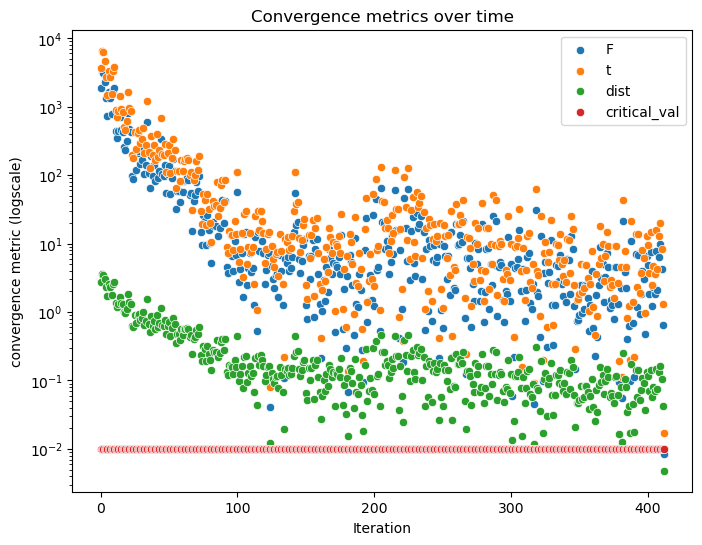

In [16]:
df = pd.DataFrame(hotelling)

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(df["hotelling_F"])
sns.scatterplot(df["hotelling_t"])
sns.scatterplot(df["dist"])
sns.scatterplot(df["critical_val"])
ax.set_yscale("log")

ax.legend(["F", "t", "dist", "critical_val"])
ax.set(xlabel='Iteration', ylabel='convergence metric (logscale)')
ax.set_title("Convergence metrics over time")

plt.show()


## And finally we test the full $p_1$ model

Initial thetas - [ 0.28467955 -0.17500581  0.4877344   0.22039088 -0.54118267  0.02335399
 -0.27844808  0.60800275  0.28218862 -0.67334251 -0.34046059 -0.44708322
 -0.07974221  0.42949361  0.67332575 -0.90300602 -0.69029038 -0.01122024
 -0.86237023  0.12282413  0.54541599 -0.2803659  -0.76373158 -0.2197707
 -0.72326196  0.13236681  0.23161879 -0.14543812  0.57457923  0.23757301
 -0.33482678 -0.29897274 -0.79999467  0.49547654  0.89957297  0.28192251]
optimization started
Step 1 - lr: 0.0500000000, time from start: 0.07, sample_size: 500, sliding_grad_window_k: 20


/Users/tomtalpir/anaconda3/lib/python3.11/site-packages/scipy/spatial/distance.py:1036: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


	 Sample size increased at step 50 to 525
Step 51 - lr: 0.0450000000, time from start: 6.20, sample_size: 525, sliding_grad_window_k: 21
	 Sample size increased at step 100 to 551
Step 101 - lr: 0.0405000000, time from start: 12.96, sample_size: 551, sliding_grad_window_k: 23
	 Sample size increased at step 150 to 578
Step 151 - lr: 0.0364500000, time from start: 19.42, sample_size: 578, sliding_grad_window_k: 25
	 Sample size increased at step 200 to 606
Step 201 - lr: 0.0328050000, time from start: 26.03, sample_size: 606, sliding_grad_window_k: 27
	 Sample size increased at step 250 to 636
Step 251 - lr: 0.0295245000, time from start: 32.90, sample_size: 636, sliding_grad_window_k: 29
	 Sample size increased at step 300 to 667
Step 301 - lr: 0.0265720500, time from start: 40.12, sample_size: 667, sliding_grad_window_k: 31
	 Sample size increased at step 350 to 700
Step 351 - lr: 0.0239148450, time from start: 47.79, sample_size: 700, sliding_grad_window_k: 33
	 Sample size increased

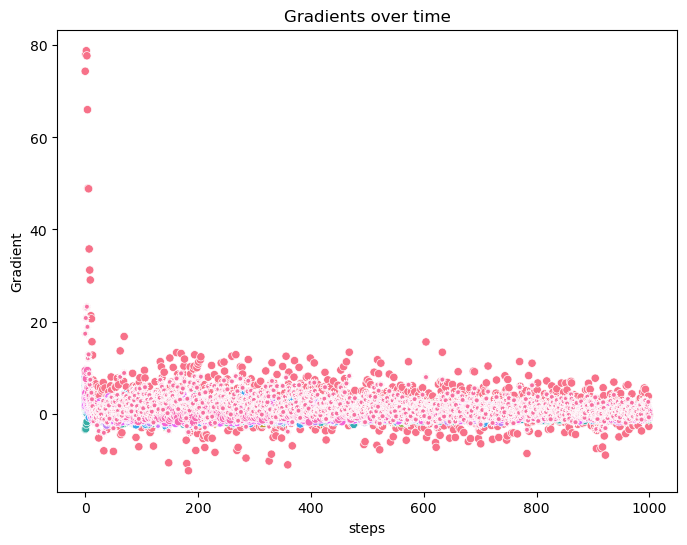

Fitted theta: [-1.33916666 -0.28106367  1.64678695  0.45700705  0.18865847  1.44964087
  0.72920582  1.56529912  0.80317979  2.3891337   1.7056358  -0.16230738
 -0.22083005  0.77134437  2.1706618   1.65699688  1.45512865  2.12623799
 -0.1221462  -3.28117473 -1.88834942 -0.83074374 -3.77143335 -1.6985082
 -2.49598512 -2.41386072 -4.35381237 -3.38266007 -1.02764712 -1.55095405
 -1.7356062  -3.60552719 -3.34554436 -3.74921788 -3.66294883  4.14004824]


In [17]:
n = sampson_matrix.shape[0]
is_directed = True



estimated_p_seed = np.sum(sampson_matrix) / (n*(n-1))

metrics = [NumberOfEdgesDirected(), OutDegree(), InDegree(), TotalReciprocity()]

fitted_model = ERGM(n, metrics, is_directed=is_directed, sample_size=500, n_mcmc_steps=20, seed_MCMC_proba=estimated_p_seed)

# convergence_criterion = "zero_grad_norm"
convergence_criterion = "hotelling"
grads, hotelling = fitted_model.fit(sampson_matrix, lr=0.05, opt_steps=1000, 
                         lr_decay_pct=0.1, steps_for_decay=50,
                         sliding_grad_window_k=20, sample_pct_growth=0.05, 
                         convergence_criterion=convergence_criterion, 
                         optimization_method="newton_raphson",
                         hotelling_confidence=0.95
                         )

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(grads, ax=ax, legend=False)
ax.set(xlabel='steps', ylabel='Gradient')
ax.set_title("Gradients over time")
plt.show()

print(f"Fitted theta: {fitted_model._thetas}")

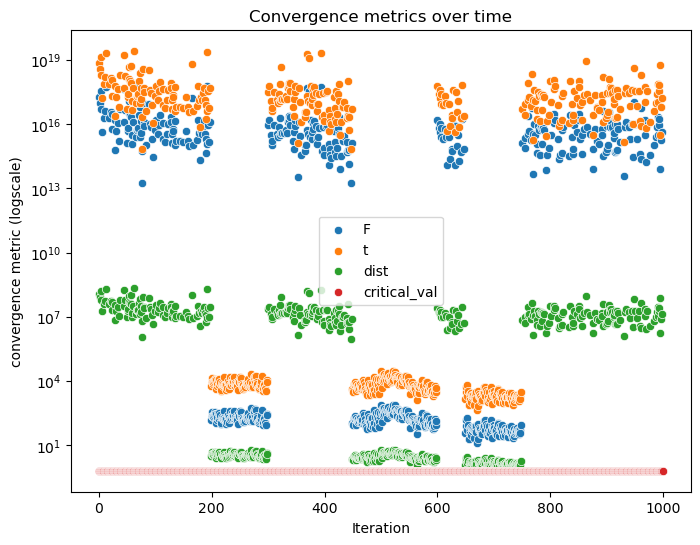

In [18]:
df = pd.DataFrame(hotelling)

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(df["hotelling_F"])
sns.scatterplot(df["hotelling_t"])
sns.scatterplot(df["dist"])
sns.scatterplot(df["critical_val"])
ax.set_yscale("log")

ax.legend(["F", "t", "dist", "critical_val"])
ax.set(xlabel='Iteration', ylabel='convergence metric (logscale)')
ax.set_title("Convergence metrics over time")

plt.show()


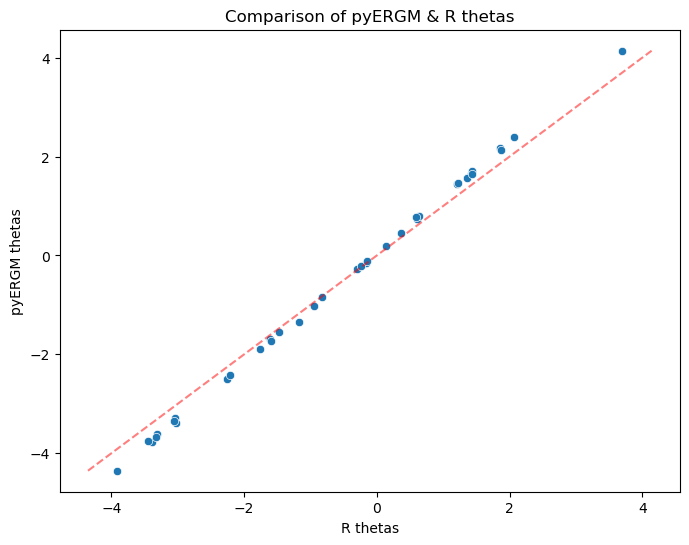

In [24]:
true_values = {"edges":      -1.1761, "sender2":    -0.2945, "sender3":     1.4141, "sender4":     0.3662, "sender5":     0.1315, "sender6":     1.2148, "sender7":     0.6055,
"sender8":     1.3609, "sender9":     0.6402, "sender10":    2.0639, "sender11":    1.4355, "sender12":   -0.1681, "sender13":   -0.2322, "sender14":    0.5841, "sender15":    1.8600,
"sender16":    1.4317, "sender17":    1.2211, "sender18":    1.8724, "receiver2":  -0.1522, "receiver3":  -3.0453, "receiver4":  -1.7596, "receiver5":  -0.8198, "receiver6":  -3.3922,
"receiver7":  -1.6074, "receiver8":  -2.2656, "receiver9":  -2.2069, "receiver10": -3.9189, "receiver11": -3.0257, "receiver12": -0.9457, "receiver13": -1.4749, "receiver14": -1.5950,
"receiver15": -3.3147, "receiver16": -3.0567, "receiver17": -3.4436, "receiver18": -3.3239, "mutual":       3.6918
}

true_predictions = np.array(list(true_values.values()))
fitted_thetas = fitted_model._thetas

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=true_predictions, y=fitted_thetas)

min_x = min(min(true_predictions), min(fitted_thetas))
max_x = max(max(true_predictions), max(fitted_thetas))

sns.lineplot(x=[min_x, max_x], y=[min_x, max_x], color="red", linestyle="--", alpha=0.5)
ax.set(xlabel='R thetas', ylabel='pyERGM thetas')
ax.set_title("Comparison of pyERGM & R thetas")
plt.show()


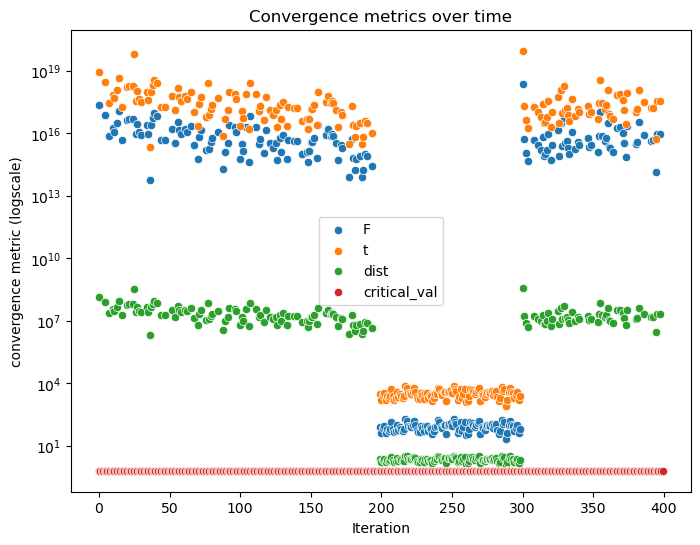

<Axes: ylabel='critical_val'>

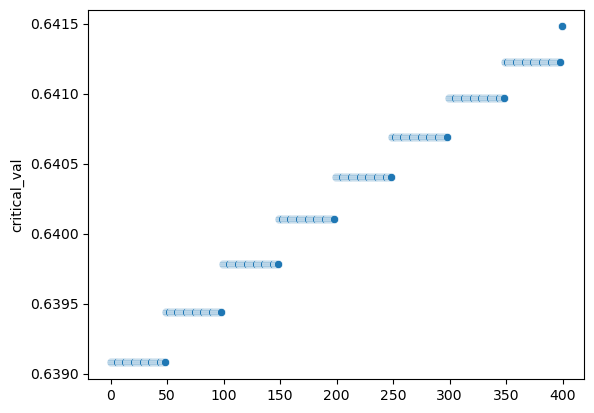

In [15]:
sns.scatterplot(df["critical_val"])